<a href="https://colab.research.google.com/github/amrutha1810/BIS-LAB/blob/main/particle_swarm_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Best Position:  [2.60012533 2.80014544]
Best Fitness Value:  1.8430843627393117e-07
Average Particle Best Fitness Value:  0.0005497586309151202
Number of Generations:  47


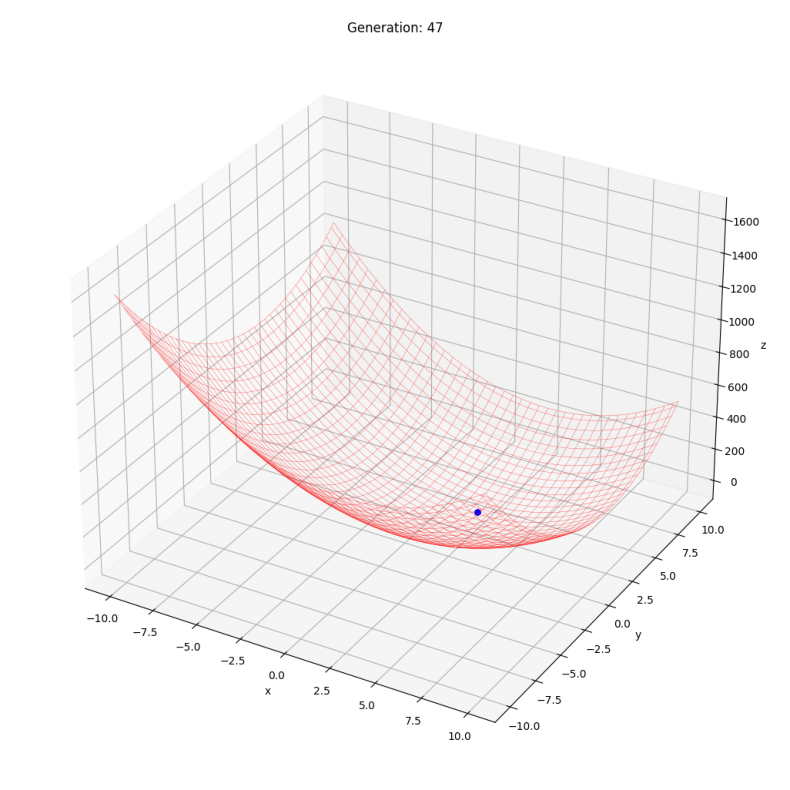

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def fitness_function(x1, x2):
    f1 = x1 + 2 * -x2 + 3
    f2 = 2 * x1 + x2 - 8
    z = f1**2 + f2**2
    return z

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    new_velocity = np.zeros_like(particle)
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    w = random.uniform(w_min, max)

    for i in range(len(particle)):
        new_velocity[i] = (w * velocity[i] +
                           c * r1 * (pbest[i] - particle[i]) +
                           c * r2 * (gbest[i] - particle[i]))
    return new_velocity

def update_position(particle, velocity):
    new_particle = particle + velocity
    return new_particle

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    # Initialization
    particles = np.array([[random.uniform(position_min, position_max) for _ in range(dimension)] for _ in range(population)])
    pbest_position = particles.copy()
    pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])

    gbest_index = np.argmin(pbest_fitness)
    gbest_position = pbest_position[gbest_index]

    velocity = np.zeros((population, dimension))

    images = []  # For animation

    for t in range(generation):
        if np.average(pbest_fitness) <= fitness_criterion:
            break

        for n in range(population):
            velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
            particles[n] = update_position(particles[n], velocity[n])

        pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])
        for n in range(population):
            if pbest_fitness[n] < fitness_function(pbest_position[n][0], pbest_position[n][1]):
                pbest_position[n] = particles[n]

        gbest_index = np.argmin(pbest_fitness)
        gbest_position = pbest_position[gbest_index]

        # Plotting the current positions of the particles
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        x = np.linspace(position_min, position_max, 80)
        y = np.linspace(position_min, position_max, 80)
        X, Y = np.meshgrid(x, y)
        Z = fitness_function(X, Y)
        ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

        ax.scatter3D(
            particles[:, 0],
            particles[:, 1],
            [fitness_function(p[0], p[1]) for p in particles],
            c='b'
        )

        # Capture the frame for animation
        plt.title(f'Generation: {t + 1}')
        plt.tight_layout()
        plt.savefig(f'frame_{t}.png')
        plt.close(fig)

    # Create animation
    frames = [plt.imread(f'frame_{i}.png') for i in range(t)]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    image = ax.imshow(frames[0])

    def update(frame):
        image.set_array(frames[frame])
        return image,

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=100)
    ani.save('./pso_simple.gif', writer='pillow')

    # Print the results
    print('Global Best Position: ', gbest_position)
    print('Best Fitness Value: ', min(pbest_fitness))
    print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
    print('Number of Generations: ', t)

# Run the PSO algorithm
pso_2d(population=30, dimension=2, position_min=-10, position_max=10, generation=100, fitness_criterion=1e-3)